In [2]:
import numpy as np
import matplotlib.pyplot as plt

In [31]:
def wlj(dx, params, r_cut, shift=False):
    epsilon = params["epsilon_a"]
    sigma = params["sigma"]
    delta = params["delta_a"]
    e_shift = 0.0

    dr = np.linalg.norm(dx)

    if dr < sigma * 2 ** (1/6):
        epsilon = params["epsilon"]
        delta = params["delta"]
        e_shift = -params["epsilon_a"] + params["epsilon"]

    dsigma = (1.0 - delta/2.0**(1/6)) * sigma

    if dr >= r_cut:
        return np.array([0.0, 0.0, 0.0], dtype=np.float64), 0.0

    f = 4.0 * epsilon * (12.0 * dsigma ** 12 / (dr - delta) ** 13 - 6.0 * dsigma ** 6 / (dr - delta) ** 7) * np.array(dx, dtype=np.float64) / dr
    e = 4.0 * epsilon * (dsigma ** 12 / (dr - delta) ** 12 - dsigma ** 6 / (dr - delta) ** 6) + e_shift
    if shift:
        e -= 4.0 * epsilon * (dsigma ** 12 / (r_cut - delta) ** 12 - dsigma ** 6 / (r_cut - delta) ** 6)

    return f, e

In [32]:

params = {"epsilon": 1.0, "sigma": 1.5, "delta": 0.0, "epsilon_a": 0.0, "delta_a": 0.0}
r_cut = 2.5

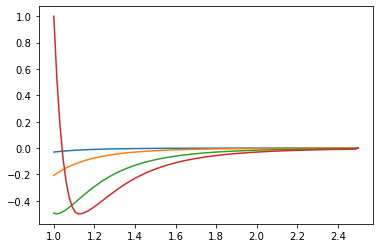

In [35]:
for sigma in [0.5, 0.7, 0.9, 1.0]:
    params = {"epsilon": 1.5, "sigma": sigma, "delta": 0.0, "epsilon_a": 0.5, "delta_a": 0.0}
    r_cut = 2.5
    rs = np.linspace(1.0, r_cut, 100)
    f = []
    e = []
    for r in rs:
        d = wlj([r, 0, 0], params, r_cut)
        f.append(d[0][0])
        e.append(d[1])
    plt.plot(rs, e)